# 2 Redes neuronales densamente conectadas


In [73]:
import keras
keras.__version__

'2.1.3'

Precarga de los datos en Keras

In [74]:
from keras.datasets import mnist

# obtenemos los datos para train y test 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [75]:
print(x_train.ndim) 

3


In [76]:
print(x_train.shape)

(60000, 28, 28)


In [77]:
print(x_train.dtype)

uint8


In [78]:
len (y_train)

60000

1


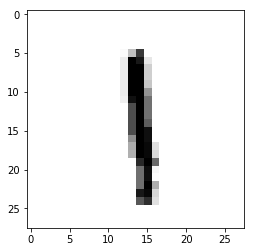

In [79]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)
print(y_train[8])

In [80]:
import numpy
from numpy import linalg
numpy.set_printoptions(precision=2, suppress=True, linewidth=120)
print(numpy.matrix(x_train[8]))



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  48   0   0   0   

4


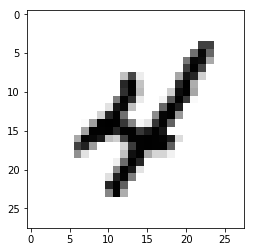

In [81]:
plt.imshow(x_train[9], cmap=plt.cm.binary)
print(y_train[9])

3


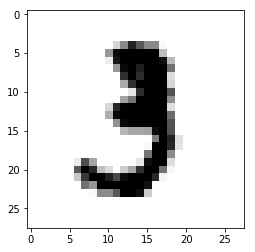

In [82]:
plt.imshow(x_train[10], cmap=plt.cm.binary)
print(y_train[10])

6


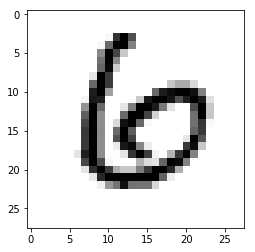

In [83]:
plt.imshow(x_test[11], cmap=plt.cm.binary)
print(y_test[11])

In [84]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255


In [85]:
print(numpy.matrix(x_train[8]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.25 0.77 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.08 1.   0.9  0.09 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.  ]

In [86]:

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [87]:
print(y_test[0])

7


In [88]:
print(y_train[0])

5


In [89]:
print(y_train.shape)

(60000,)


In [90]:
print(x_test.shape)

(10000, 784)


In [91]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [92]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [93]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [94]:
print(y_train.shape)

(60000, 10)


In [95]:
print(y_test.shape)

(10000, 10)


Definición del modelo

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import sgd

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Aprendizaje, entrenamiento y evaluación

In [97]:
batch_size = 50
num_classes = 10
epochs=10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1
          )

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 2.0472 - acc: 0.4175
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 1.6058 - acc: 0.6068
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.2965 - acc: 0.7054
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 1.0841 - acc: 0.7676
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.9347 - acc: 0.8018
Epoch 6/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.8248 - acc: 0.8221
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.7411 - acc: 0.8357
Epoch 8/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.6759 - acc: 0.8476
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.6243 - acc: 0.8571
Epoch 10/10
10000/10000 [==============================] - 0s 18us/step
Test loss: 0.547649202156066

Predicciones

In [99]:
predictions = model.predict(x_test)

In [100]:
print(predictions[11])

[0.06 0.01 0.17 0.01 0.05 0.04 0.54 0.   0.11 0.02]


1.0

In [25]:
np.sum(predictions[11])

0.99999994

In [39]:
np.argmax(predictions[11])

6

In [49]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')



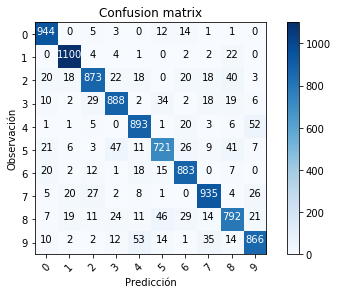

In [50]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))